In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [114]:
# sql query (keep data from 2020 to 2023) 
# we are going to use the same query for each year 

query1 = """
WITH escalas AS (SELECT NUM_ESCALA_23
FROM TB_STD_ESCALES_23 tse 
WHERE tse.ANY_ESCALA_23 = 2023)
SELECT *
FROM PORTICCB.TB_CRYSTALBOX_IMPORT tci 
WHERE tci.ESCALA IN (SELECT NUM_ESCALA_23 FROM escalas)
AND tci.MANIFEST_NUMERO IS NOT NULL
"""

query2 = """WITH escalas AS (SELECT NUM_ESCALA_23
FROM TB_STD_ESCALES_23 tse 
WHERE tse.ANY_ESCALA_23 = 2022)
SELECT *
FROM PORTICCB.TB_CRYSTALBOX_IMPORT tci 
WHERE tci.ESCALA IN (SELECT NUM_ESCALA_23 FROM escalas)
AND tci.MANIFEST_NUMERO IS NOT NULL
"""

query3 = """WITH escalas AS (SELECT NUM_ESCALA_23
FROM TB_STD_ESCALES_23 tse 
WHERE tse.ANY_ESCALA_23 = 2021)
SELECT *
FROM PORTICCB.TB_CRYSTALBOX_IMPORT tci 
WHERE tci.ESCALA IN (SELECT NUM_ESCALA_23 FROM escalas)
AND tci.MANIFEST_NUMERO IS NOT NULL
"""

In [115]:
date_columns =['COARRI_ONLINE_DATA',
'DATA_CARREGA_TERMINAL_03',
'DATA_ENTREGA_I07',
'DATA_RECOLLIDA_PREAVIS',
'DATA_SERVEI_OT',
'DESCARREGA_VAIXELL_DATA',
'ENTREGA_CLIENT_DATA',
'ENTREGA_CONTENIDOR_BUIT_DATA',
'INFORME_DESCARREGA_DATA',
'LLISTA_DESCARREGA_DATA',
'LLIURIS_DATA_EXPIRACIO',
'LLIURIS_MERCADERIA_DATA',
'MANIFEST_DATA_ACTIVACIO',
'MANIFEST_DATA_ARRIBADA',
'MANIFEST_DATA_OK',
'MANIFEST_DATA_PRESENTACIO',
'NOTIFICACIO_I08_DATA',
'NOTIFICACIO_I09_DATA',
'ORDRE_TRANSPORT_DATA',
'OT_DATA_SERVEI_FI',
'OT_DATA_SERVEI_INI',
'PETICIO_OT_DATA',
'PREAVIS_CONTENIDOR_DATA',
'PREAVIS_MERCADERIA_DATA',
'SORTIDA_TERMINAL_DATA',
'VAIXELL_DATA_ARRIBADA_PREVISTA',
'VAIXELL_DATA_ARRIBADA_REAL',
'DATA_CARREGA_TERMINAL_00',
'PREAVIS_MERCADERIA_XOFER',
'PREAVIS_CONTENIDOR_XOFER']

# columns to transform to categorical
cat_columns = ['ESCALA',
               'VAIXELL_NOM',
               'VAIXELL_ORIGEN',
               'VAIXELL_ESTIBADOR',
               'DESCARREGA_VAIXELL_TERMINAL',
               'NIF_TERMINAL',
               'NIF_DEPOT',
               'TIPUS_CONTENIDOR',
               'NIF_CONSIGNATARI_MERCADERIA',
               'NIF_DECLARANT_SUMARIA',
               'ORIGEN_MERCADERIA',
               'VAIXELL_NIF_CONSIGNATARI',
               'VAIXELL_NAVIERA',
               'VAIXELL_BANDERA',
               'MOLL_DESCARREGA',
               'CANAL_ADUANA',
               'DECLARANT_ADUANA',
               'PETICIO_OT_EMISSOR',
               'SCAC_NAVIERA',
               'SHIPPER_COD',
               'SHIPPER_NOM',
               'CONSIGNEE_COD',
               'CONSIGNEE_NOM',
               'NOTIFY_1_COD',
               'NOTIFY_1_NOM',
               'NOTIFY_2_COD',
               'NOTIFY_2_NOM',
               'NOTIFY_3_COD',
               'NOTIFY_3_NOM',
               'FORWARDER_COD',
               'FORWARDER_NOM',
               'CONTRACTOR_COD',
               'CONTRACTOR_NOM',
               'BOOKING_PARTY_COD',
               'BOOKING_PARTY_NOM']

## DATA PREPARATION

$~$

In [116]:
#read data from the .csv file -results.csv- parse dates columns
df = pd.read_csv('results.csv', parse_dates=date_columns)

# for the columns in cat_columns, transform to categorical type
for col in cat_columns:
    df[col] = df[col].astype('category')    

In [117]:
#show columns wih null values and the number of null values if there are more than 0
nulls = df.isnull().sum()[df.isnull().sum() > 0].to_frame()
nulls.columns = ['nulls']
nulls.sort_values(by='nulls', ascending=False)

,nulls
PREAVIS_CONTENIDOR_XOFER,218942
DESCARREGA_VAIXELL_TERMINAL,218942
DATA_CARREGA_TERMINAL_00,218942
VAIXELL_NIF_CONSIGNATARI,218942
NIF_DECLARANT_SUMARIA,218942
...,...
TIPUS_CONTENIDOR,643
NIF_CONSIGNATARI_MERCADERIA,504
MANIFEST_DATA_PRESENTACIO,451
BL,438


In [118]:
df[(df['MATRICULA'] == 'R6175BBH')][['MANIFEST_DATA_ACTIVACIO', 'MANIFEST_DATA_ARRIBADA', 'MANIFEST_DATA_OK', 'MANIFEST_DATA_PRESENTACIO', 'MANIFEST_NUMERO']]

,MANIFEST_DATA_ACTIVACIO,MANIFEST_DATA_ARRIBADA,MANIFEST_DATA_OK,MANIFEST_DATA_PRESENTACIO,MANIFEST_NUMERO
3,2023-01-19 23:00:00,2023-01-19 23:43:00,2013-07-23 12:36:00,2013-07-23 11:41:00,8113541878
45028,2023-03-04 11:21:00,2023-03-04 12:02:00,2013-08-20 12:33:00,2013-08-20 08:44:00,8113542265
90943,2023-01-09 06:54:00,2023-01-09 07:42:00,2013-07-05 18:02:00,2013-07-05 17:54:00,8113541599
135603,2013-09-18 10:38:00,2013-09-17 19:17:00,2023-03-24 10:17:00,2023-03-24 10:17:00,8113543576
157434,2013-10-10 10:00:00,2013-10-08 19:18:00,2013-10-10 10:02:00,2013-10-10 09:57:00,8113543657
163963,2023-03-11 17:28:00,2023-03-11 18:06:00,2013-08-01 12:26:00,2013-08-01 12:22:00,8113542334
178479,2023-03-03 09:00:00,2023-03-03 09:36:00,2013-08-28 09:27:00,2013-08-28 08:49:00,8113542920
188339,2023-02-25 03:50:00,2023-02-25 04:48:00,2013-08-27 08:39:00,2013-08-27 08:37:00,8113542700
207332,2013-10-01 09:20:00,2013-09-30 19:14:00,2013-10-01 09:21:00,2013-10-01 09:18:00,8113543634
214440,2013-09-30 10:00:00,2013-09-26 19:16:00,2013-09-30 09:43:00,2013-09-30 09:40:00,8113543632


## DECLARACIÓN SUMARIA

$~$

In [119]:
df[['MANIFEST_DATA_ACTIVACIO',
'MANIFEST_DATA_ARRIBADA',
'MANIFEST_DATA_OK',
'MANIFEST_DATA_PRESENTACIO']].describe()

,MANIFEST_DATA_ACTIVACIO,MANIFEST_DATA_ARRIBADA,MANIFEST_DATA_OK,MANIFEST_DATA_PRESENTACIO
count,191417,193567,216855,218491
unique,1409,1469,2647,2611
top,2023-02-05 17:01:00,2023-02-05 18:13:00,2023-03-01 11:53:00,2023-03-01 11:53:00
freq,3750,3750,3892,3892
first,2013-07-04 09:06:00,2013-07-03 19:39:00,2013-07-02 20:27:00,2013-07-02 20:11:00
last,2023-03-24 12:06:00,2023-03-24 12:58:00,2023-03-24 13:03:00,2023-03-24 13:03:00


$~$

Los datos han sido filtrados previamente para mostrar solo las ESCALAS del año 2023. Por lo tanto, es ilógico tener datos del año 2013, que son visibles en la primera fila de la tabla presentada arriba. Esto plantea una preocupación sobre la integridad de los datos. Para superar este problema, es recomendable trabajar exclusivamente con los datos del año 2023

$~$


In [120]:
# keep only where columns 'MANIFEST_DATA_ACTIVACIO','MANIFEST_DATA_ARRIBADA','MANIFEST_DATA_OK','MANIFEST_DATA_PRESENTACIO','MANIFEST_DATA_ACTIVACIO' are not null and from the year 2023 create a new dataframe df3
df3 = df[(df['MANIFEST_DATA_ACTIVACIO'].notnull()) & (df['MANIFEST_DATA_ARRIBADA'].notnull()) & (df['MANIFEST_DATA_OK'].notnull()) & (df['MANIFEST_DATA_PRESENTACIO'].notnull()) & 
         (df['MANIFEST_DATA_ACTIVACIO'].dt.year == 2023)& (df['MANIFEST_DATA_ARRIBADA'].dt.year == 2023)& (df['MANIFEST_DATA_OK'].dt.year == 2023)& (df['MANIFEST_DATA_PRESENTACIO'].dt.year == 2023)].copy()


In [121]:
df3[['MANIFEST_DATA_ACTIVACIO',
'MANIFEST_DATA_ARRIBADA',
'MANIFEST_DATA_OK',
'MANIFEST_DATA_PRESENTACIO']].describe()

,MANIFEST_DATA_ACTIVACIO,MANIFEST_DATA_ARRIBADA,MANIFEST_DATA_OK,MANIFEST_DATA_PRESENTACIO
count,119553,119553,119553,119553
unique,935,951,1237,1219
top,2023-02-11 05:16:00,2023-02-11 06:18:00,2023-03-01 11:53:00,2023-03-01 11:53:00
freq,3721,3721,3892,3892
first,2023-01-04 17:52:00,2023-01-04 18:18:00,2023-01-03 15:30:00,2023-01-03 13:43:00
last,2023-03-24 12:06:00,2023-03-24 12:58:00,2023-03-24 10:40:00,2023-03-24 10:40:00


In [122]:
#filter the data for unique values of MANIFEST_NUMERO
df3 = df3.drop_duplicates(subset=['MANIFEST_NUMERO']).copy()


In [123]:
#show the null values for the columns 'MANIFEST_DATA_ACTIVACIO','MANIFEST_DATA_ARRIBADA','MANIFEST_DATA_OK','MANIFEST_DATA_PRESENTACIO'
df3[['MANIFEST_DATA_ACTIVACIO',
'MANIFEST_DATA_ARRIBADA',
'MANIFEST_DATA_OK',
'MANIFEST_DATA_PRESENTACIO']].isnull().sum()


MANIFEST_DATA_ACTIVACIO      0
MANIFEST_DATA_ARRIBADA       0
MANIFEST_DATA_OK             0
MANIFEST_DATA_PRESENTACIO    0
dtype: int64

$~$

We are going to discard the null values from the variables we want to analyze.

$~$


In [124]:
#keep only ['MANIFEST_DATA_ACTIVACIO','MANIFEST_DATA_ARRIBADA','MANIFEST_DATA_OK','MANIFEST_DATA_PRESENTACIO'] columns
df3 = df3[['MANIFEST_DATA_ACTIVACIO','MANIFEST_DATA_ARRIBADA','MANIFEST_DATA_OK','MANIFEST_DATA_PRESENTACIO','MANIFEST_NUMERO']].copy()

In [125]:
#show the null values for the columns 'MANIFEST_DATA_ACTIVACIO','MANIFEST_DATA_ARRIBADA','MANIFEST_DATA_OK','MANIFEST_DATA_PRESENTACIO' when MATRICULA is CAAU5572076 AND MANIFEST_NUMERO is 08113541880

df[(df['MATRICULA'] == 'CAAU5572076')][['MANIFEST_DATA_ACTIVACIO', 'MANIFEST_DATA_ARRIBADA', 'MANIFEST_DATA_OK', 'MANIFEST_DATA_PRESENTACIO', 'MANIFEST_NUMERO']]

,MANIFEST_DATA_ACTIVACIO,MANIFEST_DATA_ARRIBADA,MANIFEST_DATA_OK,MANIFEST_DATA_PRESENTACIO,MANIFEST_NUMERO
22,2023-02-26 17:10:00,2023-02-26 17:53:00,2023-02-23 10:15:00,2023-02-22 15:00:00,8113541880


In [126]:
# define a function to plot the distribution of the data by month

sns.set_context('talk')
plt.style.use('ggplot')

def plot_monthly_counts(data, col_name, title, ax):
    data[f'{col_name}_month'] = data[col_name].dt.strftime('%B')
    month_counts = data[f'{col_name}_month'].value_counts()
    sns.countplot(x=f'{col_name}_month', data=data, order=month_counts.index, palette='Blues_r', ax=ax)
    #show the values on top of the bars (without decimals)
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.0f}', (p.get_x()+0.3, p.get_height()+3),fontsize=12, color='black')
        
    ax.set_title(f'Distribución de {title} por Mes', fontweight='bold', fontsize=14)
    ax.set_xlabel('Mes', fontweight='bold', fontsize=9)
    ax.set_ylabel(f'{title}', fontweight='bold', fontsize=9)

def plot_day_of_week_counts(data, col_name, title, ax):
    data[f'{col_name}_dayofweek'] = data[col_name].dt.strftime('%A')
    day_of_week_counts = data[f'{col_name}_dayofweek'].value_counts()
    sns.countplot(x=f'{col_name}_dayofweek', data=data, order=day_of_week_counts.index, palette='Blues_r', ax=ax)
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.0f}', (p.get_x()+0.3, p.get_height()+3),fontsize=12, color='black')

    ax.set_title(f'Distribución de {title} por Día de la Semana', fontweight='bold', fontsize=14)
    ax.set_xlabel('Día de la Semana', fontweight='bold', fontsize=9)
    ax.set_ylabel(f'{title}', fontweight='bold', fontsize=9)

def plot_hourly_counts(data, col_name, title, ax):
    data[f'{col_name}_hour'] = data[col_name].dt.hour
    hour_counts = data[f'{col_name}_hour'].value_counts()
    hour_counts.plot(kind='bar',  ax=ax)
    ax.set_title(f'Distribución de {title} por Hora del Día', fontweight='bold', fontsize=14)
    ax.set_xlabel('Hora del Día', fontweight='bold', fontsize=9)
    ax.set_ylabel(f'{title}', fontweight='bold', fontsize=9)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

def plot_hourly_density(data, col_name, title, ax):
    sns.kdeplot(data[f'{col_name}_hour'], shade=True, ax=ax)
    ax.set_title(f'Distribución de {title} por Hora del Día', fontweight='bold', fontsize=14)
    ax.set_xlabel('Hora del Día', fontweight='bold', fontsize=9)
    ax.set_ylabel('Densidad', fontweight='bold', fontsize=9)
    ax.set_xlim(0, 24)
    ax.set_xticks(np.arange(0, 25, 1))
    
def plot_activation_data(data, col_name, title):
    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
    plt.subplots_adjust(hspace=0.4, wspace=0.3)
    plot_monthly_counts(data, col_name, title, ax=axs[0][0])
    plot_day_of_week_counts(data, col_name, title, ax=axs[0][1])
    plot_hourly_counts(data, col_name, title, ax=axs[1][0])
    plot_hourly_density(data, col_name, title, ax=axs[1][1])
    plt.tight_layout()
    plt.show()
    
   


$~$

## Presentacion declaracion sumaria 

$~$

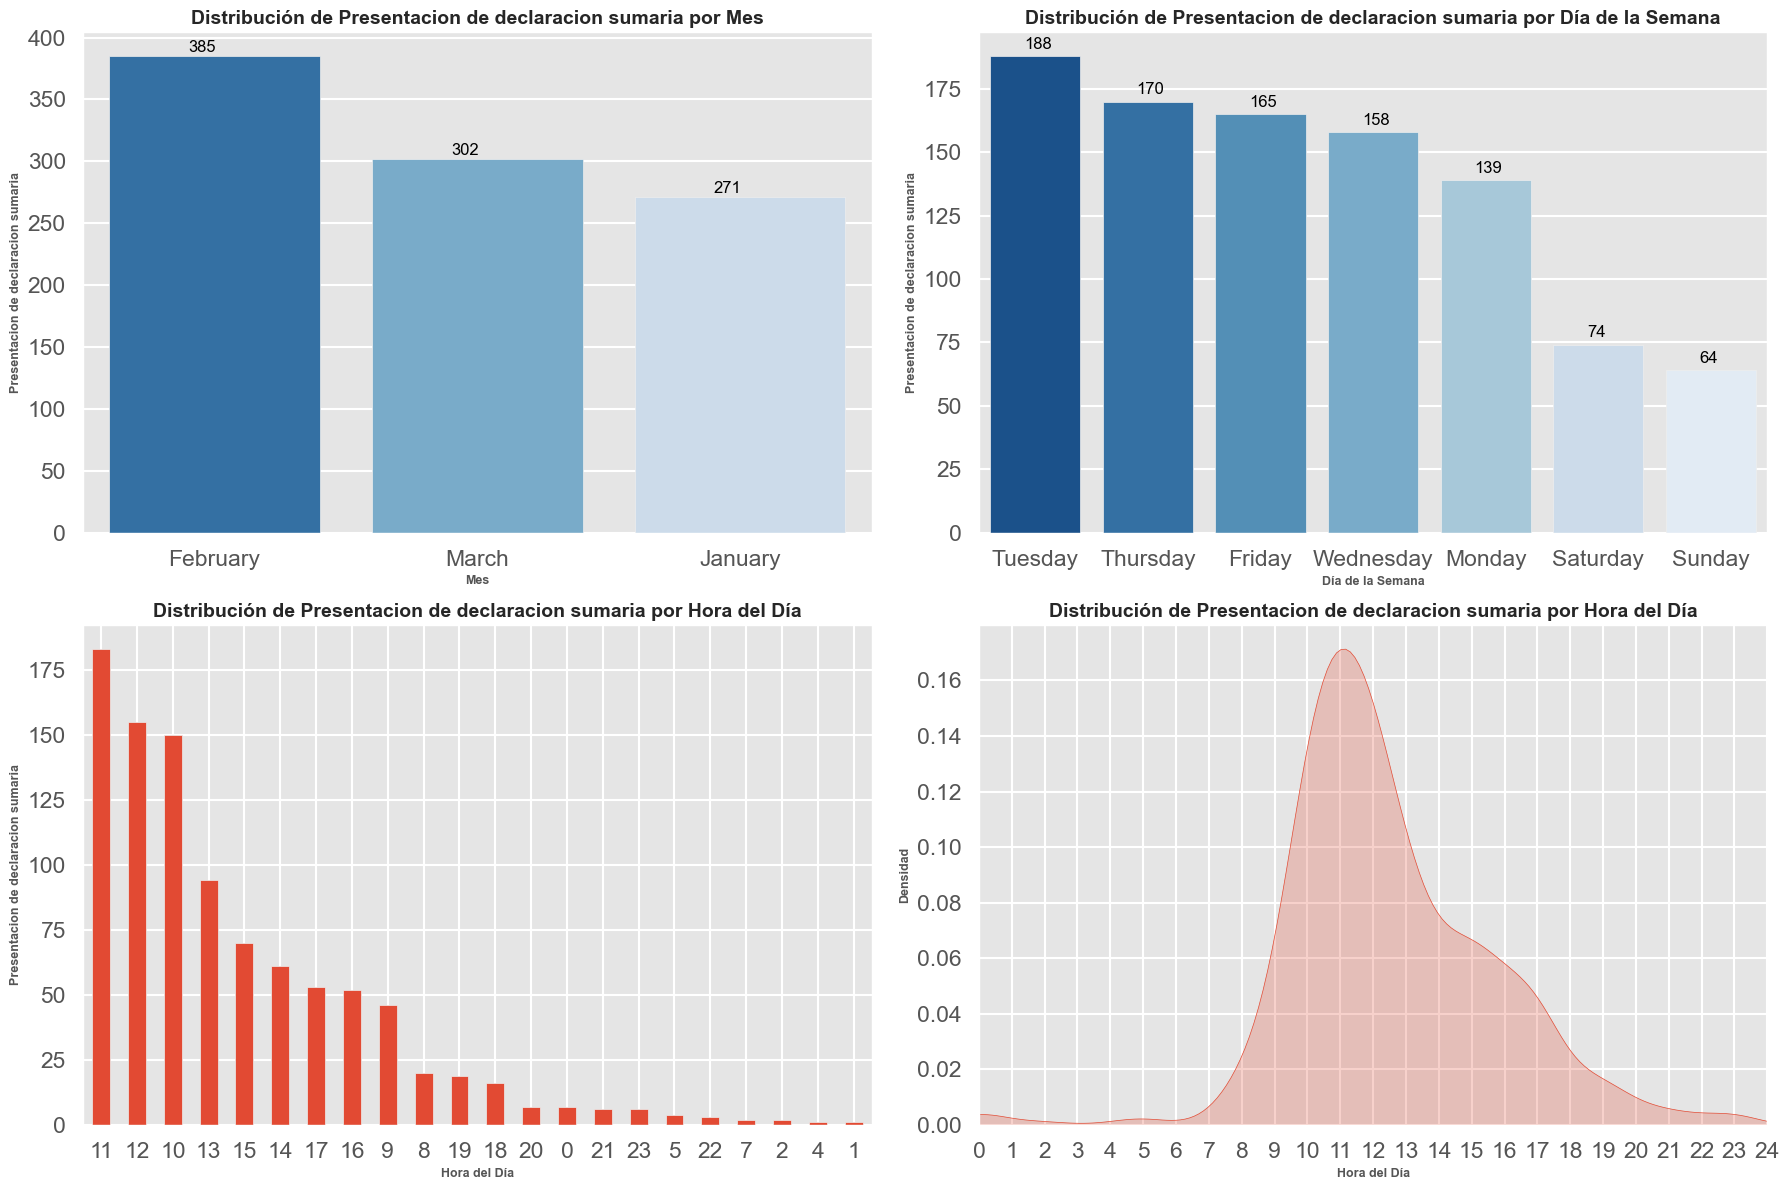

In [127]:
plot_activation_data(df3, 'MANIFEST_DATA_PRESENTACIO', 'Presentacion de declaracion sumaria')


En base a lo que se observa en el gráfico anterior se pueden obtener las siguientes conclusiones:

+ La mayoría de las presentaciones se realizaron en febrero, seguidas de cerca por marzo y en tercer lugar, enero.

+ La mayoría de las presentaciones se realizaron los martes, seguidas de los jueves y los viernes. Los fines de semana tuvieron la menor cantidad de activaciones.

+ Las horas más comunes para las presentaciones fueron las 11 am, las 12 pm y las 10 am.

$~$

## O.K Declaracion Sumaria

$~$

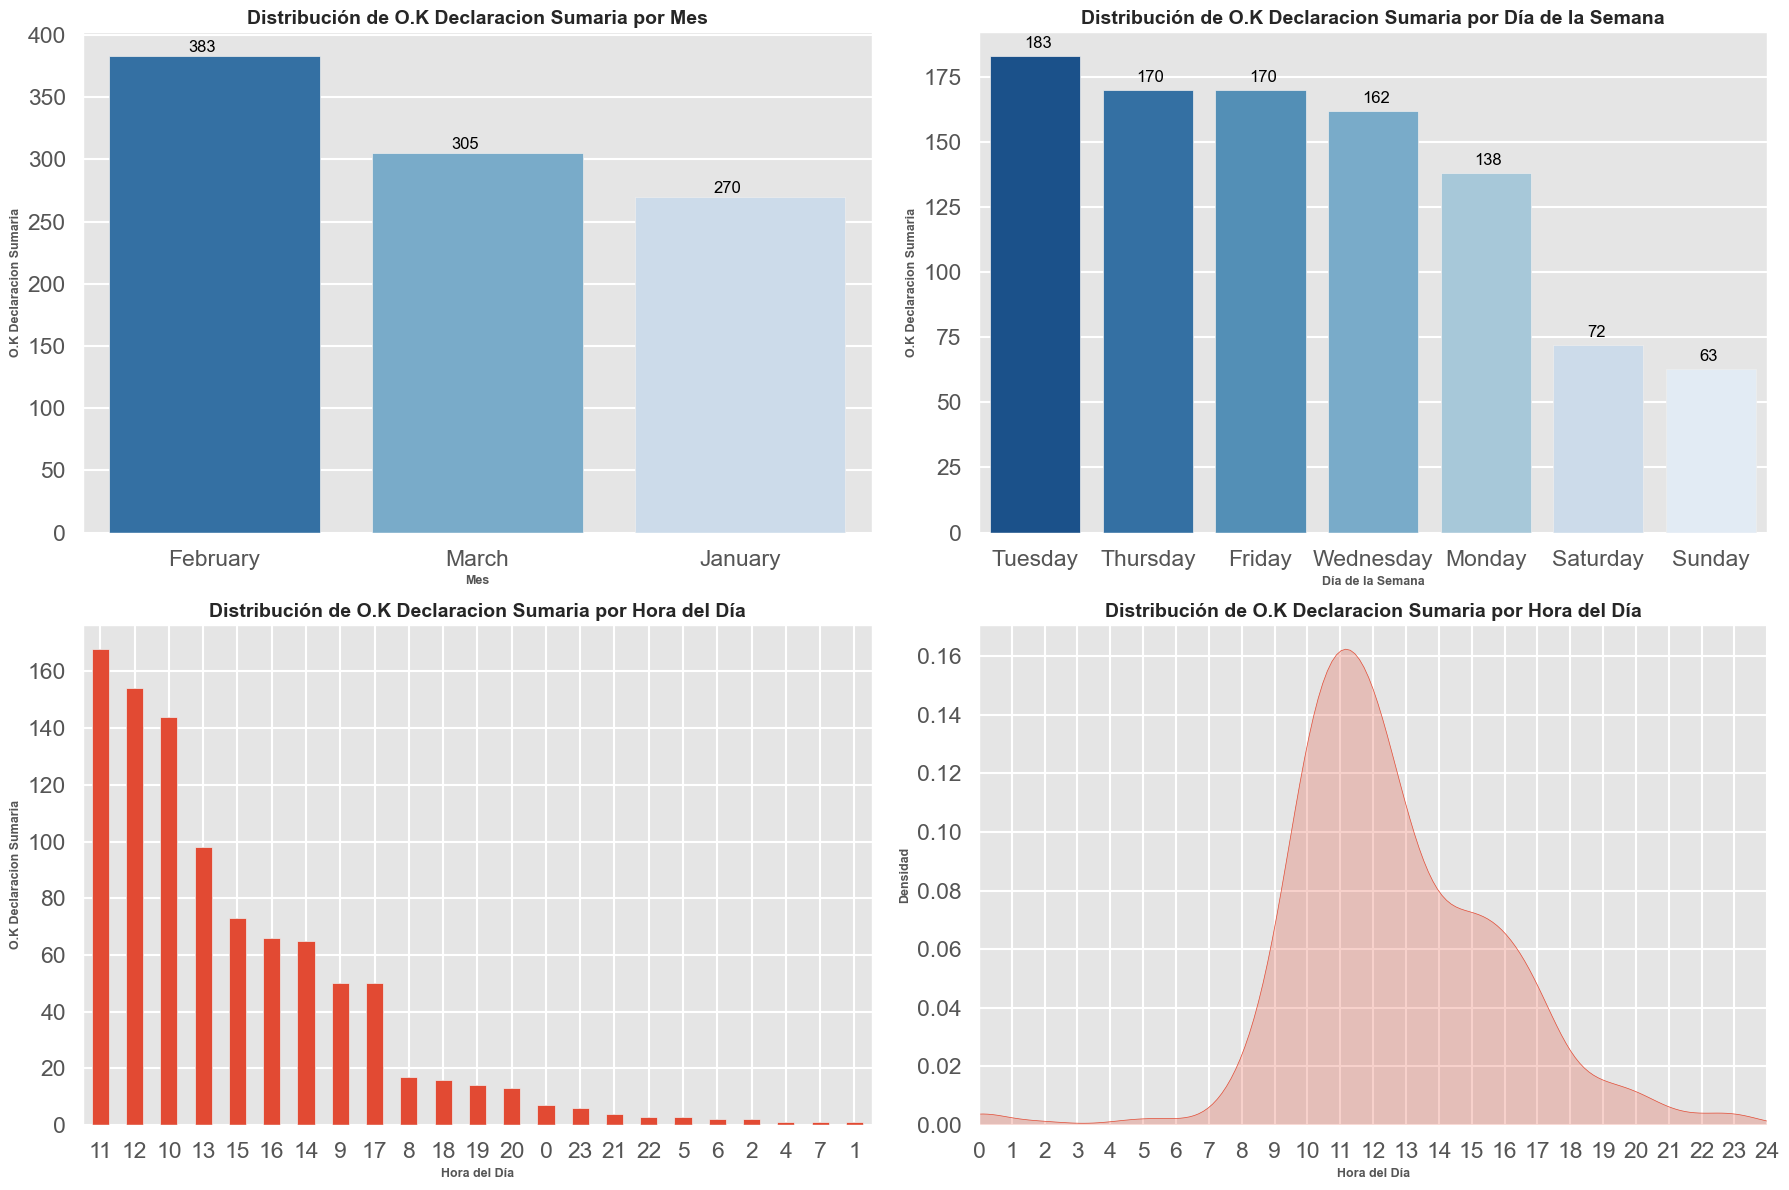

In [128]:
plot_activation_data(df3, 'MANIFEST_DATA_OK', 'O.K Declaracion Sumaria')


$~$

Basándonos en el gráfico anterior, podemos obtener algunas conclusiones:

+   Meses: La mayor cantidad de activaciones se realizó en febrero, seguida por marzo y luego en enero. Podría ser útil investigar por qué hubo más activaciones en esos meses y si hay algún patrón en particular que explique estos resultados.

+   Día de la semana: El martes fue el día con más activaciones, seguido por jueves y viernes. Los días del fin de semana, sábado y domingo, tuvieron menos activaciones en comparación con los días laborales. Es posible que esto se deba a que las activaciones están relacionadas con negocios o trabajos que se realizan en días laborales.

+   Hora del día: La hora más activa fue a las 11:00 am, seguida por las 12:00 pm y las 10:00 am. Luego, la actividad disminuye durante la tarde y la noche. Podría ser útil comprender por qué la actividad es más alta en ciertas horas del día, y si hay algún patrón o tendencia que explique estos resultados.

$~$

$~$

## Activación declaracion sumaria 

$~$

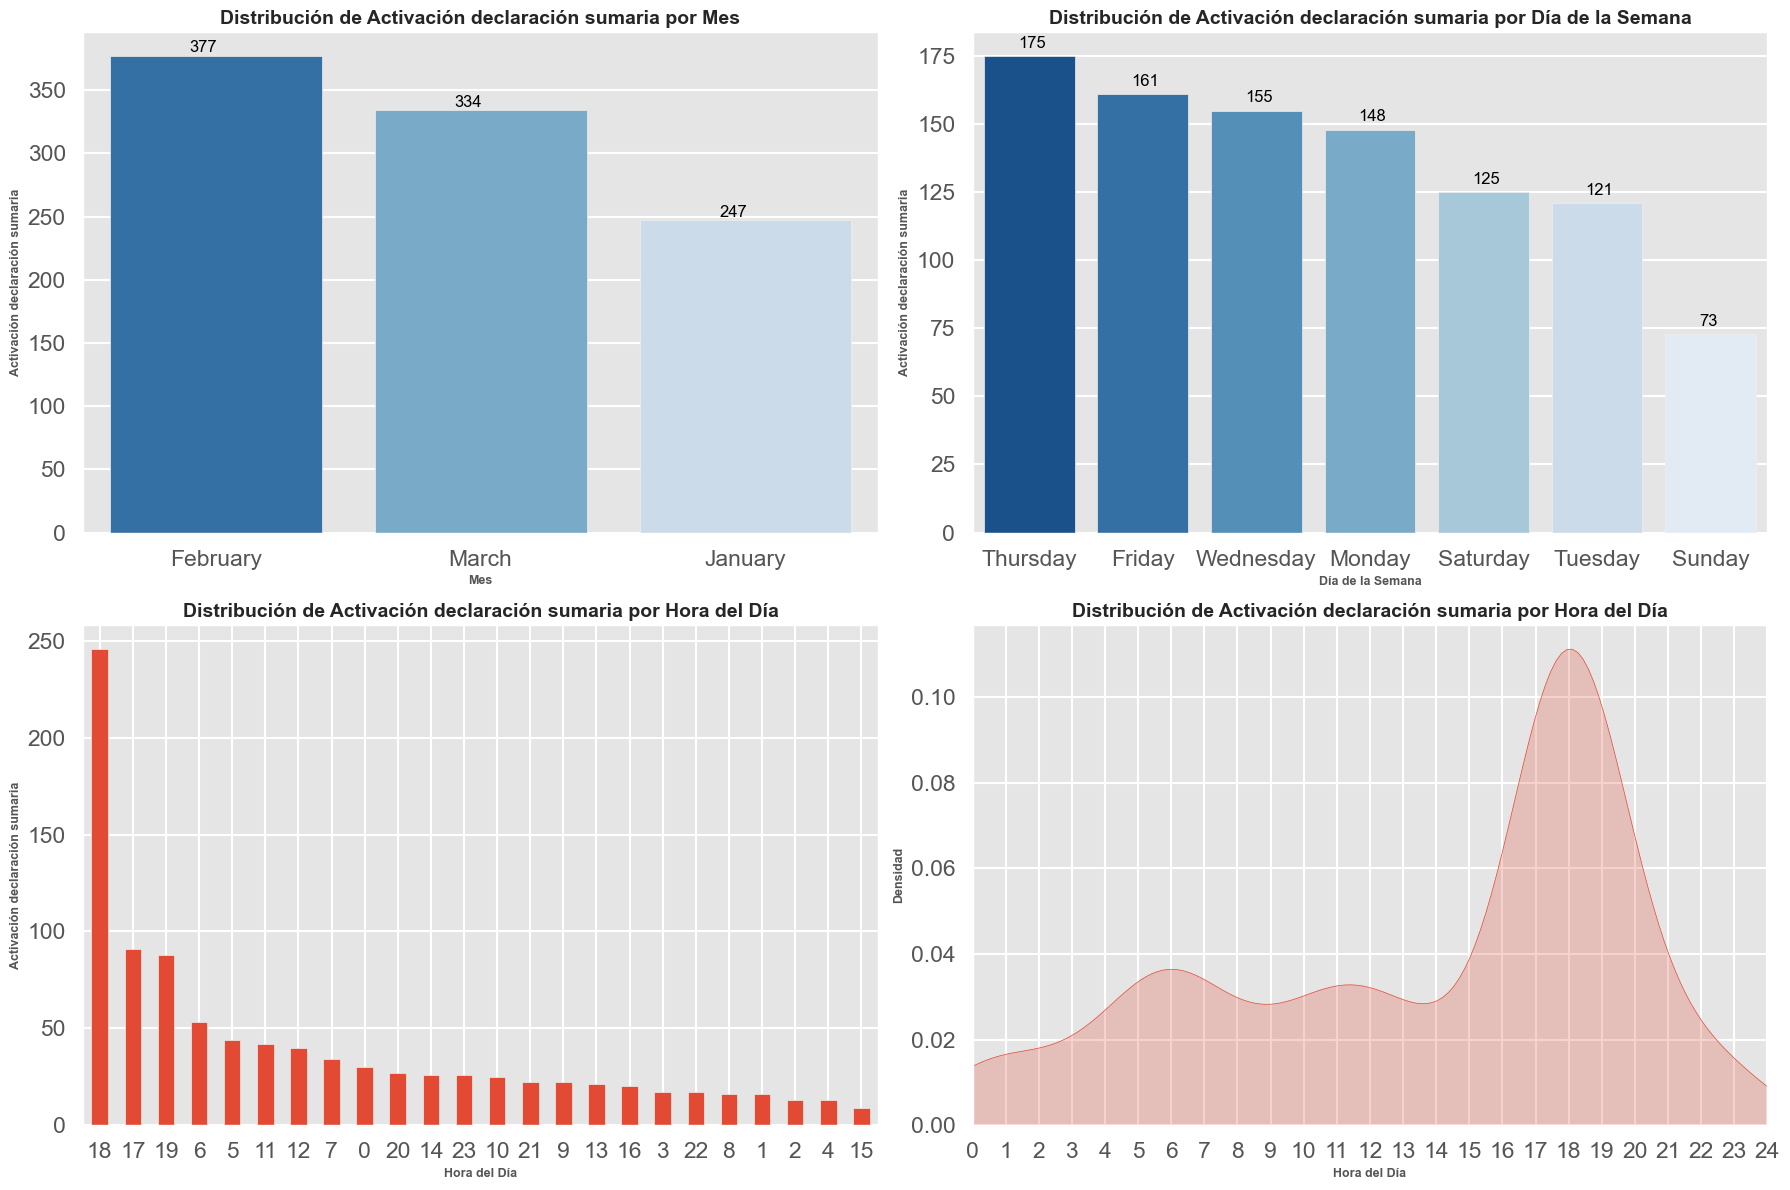

In [129]:
plot_activation_data(df3, 'MANIFEST_DATA_ACTIVACIO', 'Activación declaración sumaria')


A partir de las estadísticas proporcionadas y el código mostrado, podemos sacar algunas conclusiones sobre las activaciones en la empresa en cuestión:

+   El mes con mayor número de activaciones es febrero, seguido por marzo y en tercer lugar enero.
+   El día de la semana con más activaciones es el jueves, seguido del viernes y miércoles. El domingo es el día con menos activaciones.
+   En cuanto a la distribución de activaciones por hora del día, se puede observar que hay dos horas donde se concentra la mayor cantidad de activaciones, siendo estas las 18:00 y las 17:00. Además, la distribución de activaciones a lo largo del día tiene un comportamiento bimodal, es decir, presenta dos picos, uno en la mañana y otro en la tarde.

$~$

# Llegada declaracion sumaria

$~$



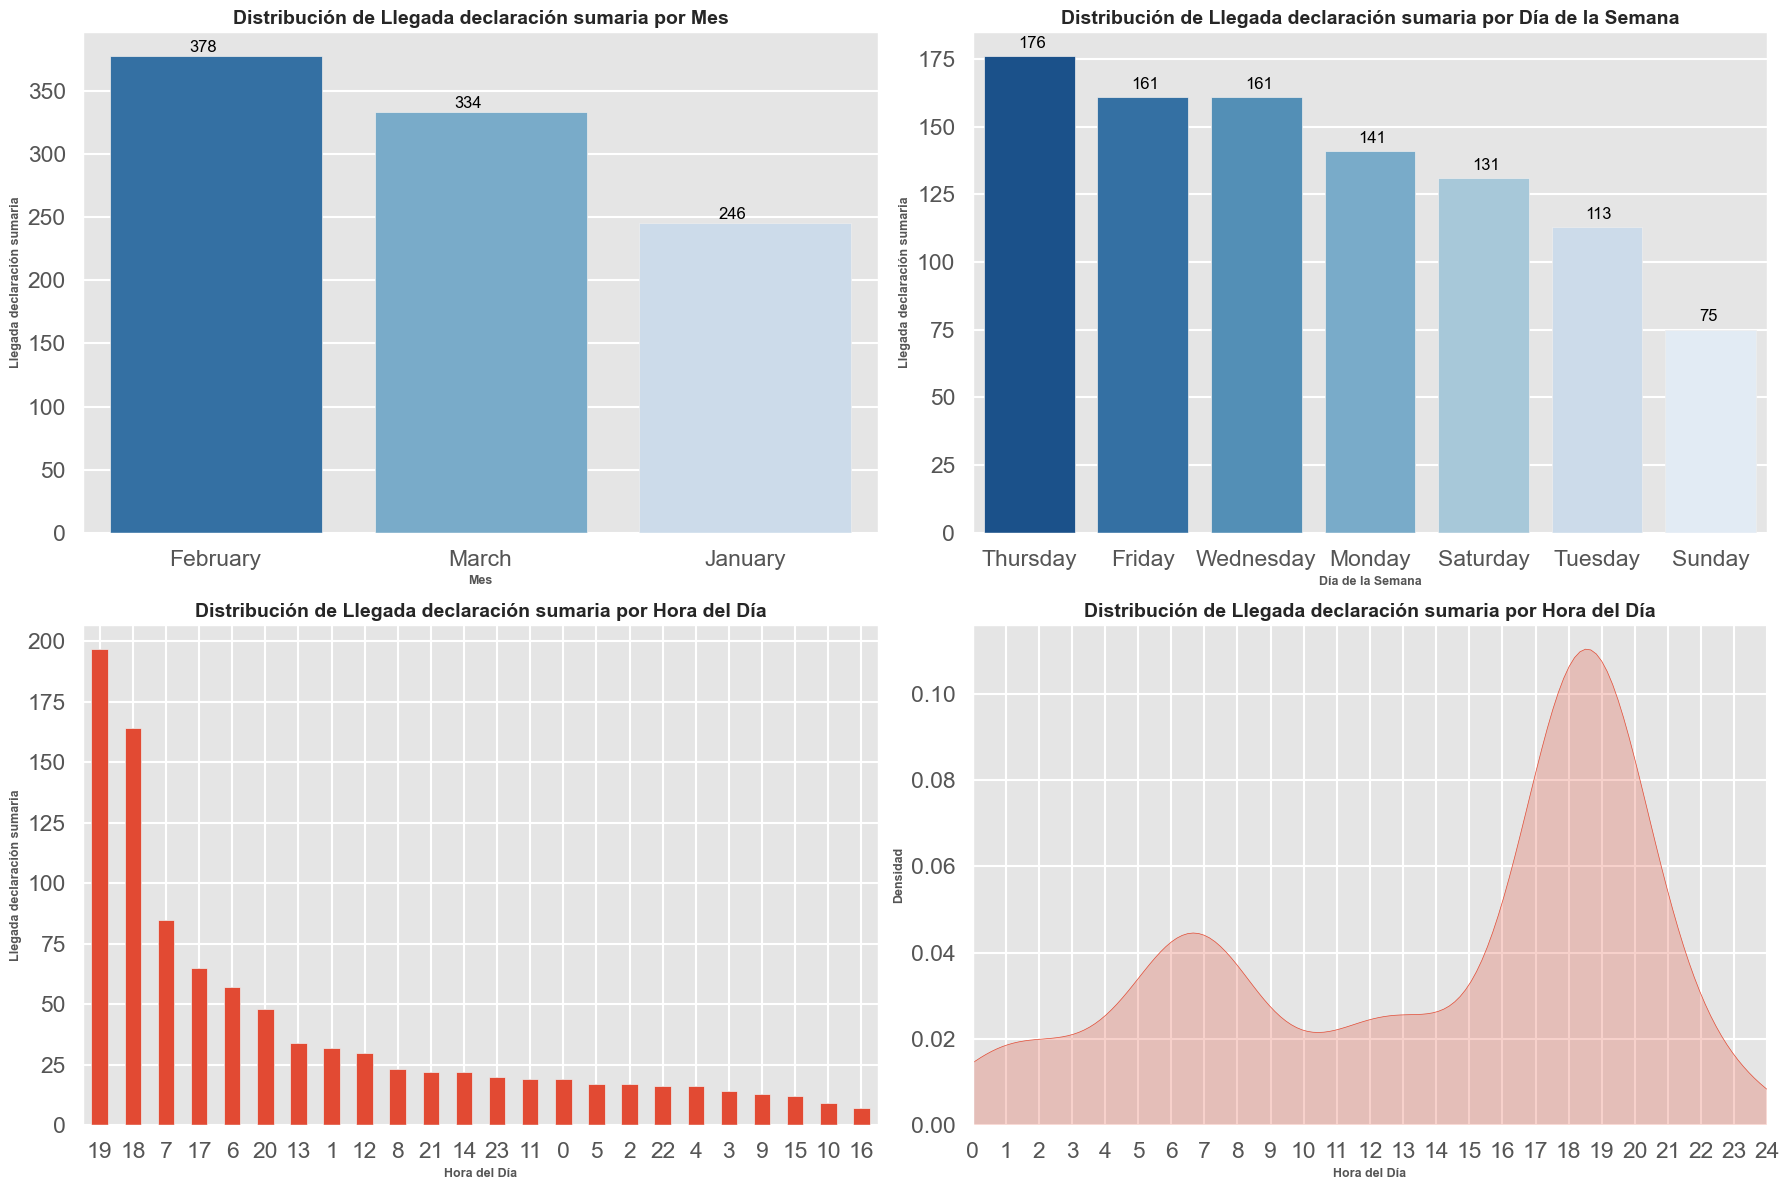

In [130]:
plot_activation_data(df3, 'MANIFEST_DATA_ARRIBADA', 'Llegada declaración sumaria')

Se desprende del grafico anterior lo siguiente:

+ El mes con más llegadas de declaraciones sumarias es febrero (378), seguido de marzo (334) y en tercer lugar enero (246).
+ Los días de la semana con mayor número de llegadas son jueves (176), viernes (161) y miércoles (161), mientras que los días con menos llegadas son martes (113) y domingo (75).
+ En cuanto a las horas del día, se observa que la hora con más llegadas es las 19:00 (197), seguida de las 18:00 (164) y las 7:00 (85).

$~$ 

##  **Time to activation**: 

the time difference in minutes between MANIFEST_DATA_ACTIVACIO and MANIFEST_DATA_PRESENTACIO.

mide el tiempo que transcurre entre dos eventos: la presentación de un documento y la activación de ese documento. En este caso, se está midiendo el tiempo en minutos que transcurre entre la "FECHA DE PRESENTACIÓN" y la "FECHA DE ACTIVACIÓN" en una declaracion sumaria proporcionada.

En otras palabras, e"Time to activation" indica la cantidad de tiempo que tarda en activarse una declaracion sumarua después de ser presentada

$~$ 


In [131]:
df3['time_to_activation'] = (df3['MANIFEST_DATA_ACTIVACIO'] - df3['MANIFEST_DATA_PRESENTACIO']).dt.total_seconds() / 60

In [132]:
display(df3.time_to_activation.describe().round(2))


count      958.00
mean      2404.88
std       4249.30
min      -6462.00
25%        321.00
50%        493.50
75%       2703.50
max      27584.00
Name: time_to_activation, dtype: float64

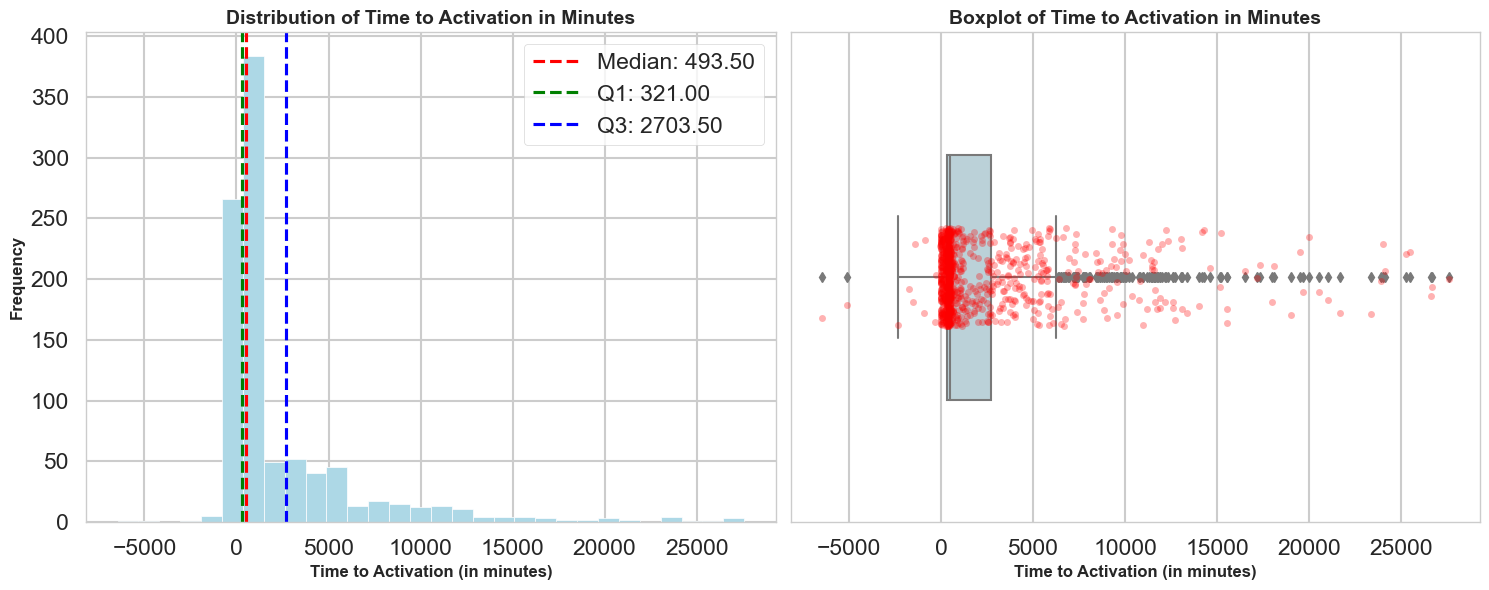

In [133]:
# Set ggplot style
sns.set_style('whitegrid')
median = df3['time_to_activation'].median()
q1 = df3['time_to_activation'].quantile(0.25)
q3 = df3['time_to_activation'].quantile(0.75)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 6))

# Add histogram to the first subplot
ax1.hist(df3['time_to_activation'], bins=30, color='lightblue')
ax1.axvline(x=median, color='red', linestyle='--', label='Median: {:.2f}'.format(median))
ax1.axvline(x=q1, color='green', linestyle='--', label='Q1: {:.2f}'.format(q1))
ax1.axvline(x=q3, color='blue', linestyle='--', label='Q3: {:.2f}'.format(q3))
ax1.set_xlabel('Time to Activation (in minutes)', fontweight='bold', fontsize=12)
ax1.set_ylabel('Frequency', fontweight='bold', fontsize=12)
ax1.set_title('Distribution of Time to Activation in Minutes', fontweight='bold', fontsize=14)
ax1.legend()

# Add boxplot to the second subplot
sns.boxplot(x=df3['time_to_activation'], showfliers=True, color='lightblue', saturation=0.5, width=0.5, linewidth=1.5, ax=ax2)
sns.stripplot(df3['time_to_activation'], orient='h', color='red', alpha=0.3, ax=ax2)


ax2.set_xlabel('Time to Activation (in minutes)', fontweight='bold', fontsize=12)
ax2.set_title('Boxplot of Time to Activation in Minutes', fontweight='bold', fontsize=14)

# Tight layout
plt.tight_layout()

# Show the plot
plt.show()


basándonos en las estadísticas y en el gráfico, podemos concluir lo siguiente:

+ La mayoría de las activaciones se producen en un tiempo relativamente corto, ya que el valor medio es de 2404.88 minutos, pero la mediana es de solo 493.50 minutos, lo que indica que hay una gran cantidad de activaciones que ocurren rápidamente.
+ La distribución es asimétrica y sesgada hacia la derecha, con valores que se extienden desde -6462.00 minutos (un valor negativo) hasta 27584.00 minutos, lo que indica que la mayoría de las activaciones se realizan en tiempos cortos, mientras que hay un número reducido de activaciones que toman un tiempo considerablemente mayor para completarse.
+ Los valores atípicos (outliers) en este caso pueden significar varias cosas, como problemas técnicos, errores humanos o retrasos en la aprobación de la activación. Por lo tanto, es importante investigar los valores atípicos para determinar su causa y tomar medidas preventivas en el futuro.
+ En términos de mejorar el análisis, podemos explorar la relación entre la variable de tiempo de activación y otras variables, como el tipo de activación, la ubicación geográfica del cliente o el tipo de problema que se está resolviendo. Además, podemos considerar el análisis de tendencias a lo largo del tiempo para ver si ha habido alguna mejora o empeoramiento en la duración de las activaciones.

**Time to Activation sin valores atípicos**

$~$

Para limpiar los valores atípicos, podemos utilizar la técnica de Tukey, que se basa en calcular el rango intercuartílico (IQR) y definir los límites superior e inferior como 1.5 veces el IQR por encima y por debajo del tercer y primer cuartil, respectivamente. Los valores que se encuentren fuera de estos límites se consideran valores atípicos y se eliminan del conjunto de datos.

$~$


In [134]:
# Calculate the interquartile range (IQR)
q1 = df3['time_to_activation'].quantile(0.25)
q3 = df3['time_to_activation'].quantile(0.75)
iqr = q3 - q1

# Calculate the upper bound for outliers
upper_bound = q3 + 1.5 * iqr

# Filter the DataFrame to exclude outliers
df3_no_outliers = df3.loc[df3['time_to_activation'] <= upper_bound]

df3_no_outliers['time_to_activation'].describe().round(2)


count     847.00
mean     1121.20
std      1580.73
min     -6462.00
25%       295.50
50%       460.00
75%      1135.00
max      6231.00
Name: time_to_activation, dtype: float64

$~$

Al tratar los outliers de la variable time_to_activation, se observa que:

+   la cantidad de observaciones se redujo de 958 a 847, lo que indica que había una cantidad significativa de valores atípicos en la distribución.

+   La media se redujo de 2404.88 a 1121.20, lo que sugiere que la presencia de valores extremadamente altos había inflado la media original.

+   El rango intercuartil (IQR) se redujo de 2382 a 839.5, lo que indica que los datos ahora están más concentrados alrededor de la mediana.

+   El valor mínimo sigue siendo negativo, lo que significa que hay algunos registros en los que la fecha de activación es anterior a la fecha de presentación. Esto puede deberse a errores en los datos o a algún problema en el proceso de activación.

En general, al eliminar los outliers, los estadísticos de resumen de la variable time_to_activation reflejan mejor la distribución de los datos y proporcionan una base más sólida para el análisis de la variable.

$~$

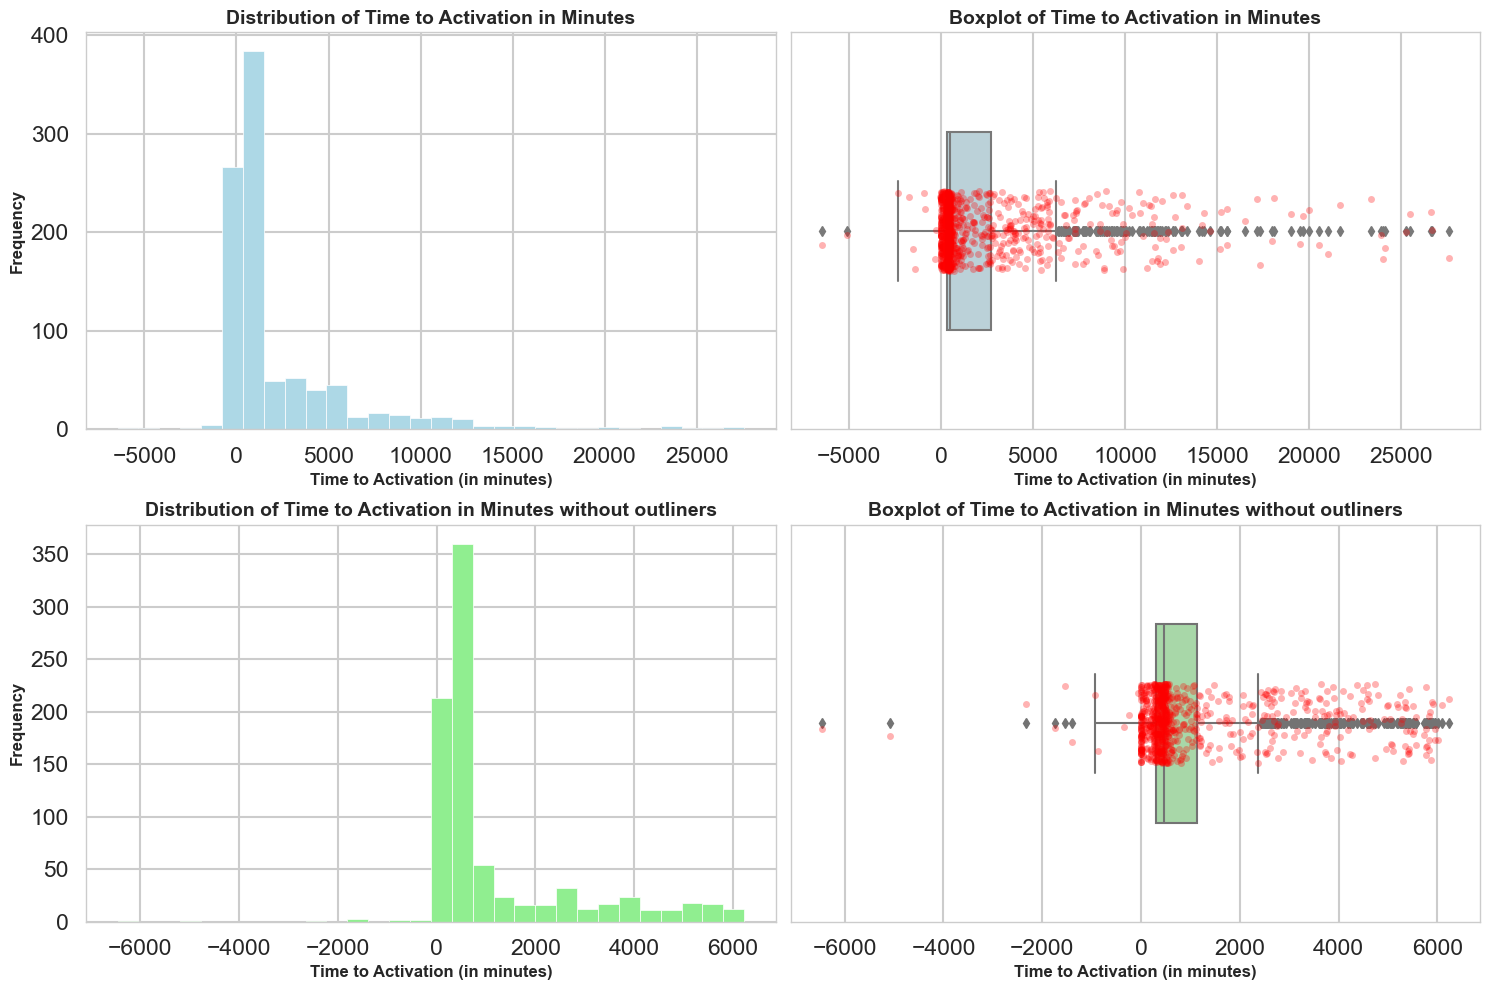

Number of outliers: 111
Percentage of outliers: 11.59%
mean: 1121.20


In [135]:
# Create a figure with 4 subplots for df3 dataframes and df3_no_outliers dataframes (2 subplots each, 1 for histogram and 1 for boxplot)

# Set ggplot style
sns.set_style('whitegrid')
# Create a figure with two subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
# Add histogram to the first subplot
ax1.hist(df3['time_to_activation'], bins=30, color='lightblue')
ax1.set_xlabel('Time to Activation (in minutes)', fontweight='bold', fontsize=12)
ax1.set_ylabel('Frequency', fontweight='bold', fontsize=12)
ax1.set_title('Distribution of Time to Activation in Minutes', fontweight='bold', fontsize=14)
# Add boxplot to the second subplot
sns.boxplot(x=df3['time_to_activation'], showfliers=True, color='lightblue', saturation=0.5, width=0.5, linewidth=1.5, ax=ax2)
sns.stripplot(df3['time_to_activation'], orient='h', color='red', alpha=0.3, ax=ax2)
ax2.set_xlabel('Time to Activation (in minutes)', fontweight='bold', fontsize=12)
ax2.set_title('Boxplot of Time to Activation in Minutes', fontweight='bold', fontsize=14)


# Add histogram to the third subplot
ax3.hist(df3_no_outliers['time_to_activation'], bins=30, color='lightgreen')
ax3.set_xlabel('Time to Activation (in minutes)', fontweight='bold', fontsize=12)
ax3.set_ylabel('Frequency', fontweight='bold', fontsize=12)
ax3.set_title('Distribution of Time to Activation in Minutes without outliners', fontweight='bold', fontsize=14)
# Add boxplot to the fourth subplot

sns.boxplot(x=df3_no_outliers['time_to_activation'], showfliers=True, color='lightgreen', saturation=0.5, width=0.5, linewidth=1.5, ax=ax4)
sns.stripplot(df3_no_outliers['time_to_activation'], orient='h', color='red', alpha=0.3, ax=ax4)
ax4.set_xlabel('Time to Activation (in minutes)', fontweight='bold', fontsize=12)
ax4.set_title('Boxplot of Time to Activation in Minutes without outliners', fontweight='bold', fontsize=14)
# Tight layout
plt.tight_layout()
# Show the plot
plt.show()


print('Number of outliers: {}'.format(df3.shape[0] - df3_no_outliers.shape[0]))
print('Percentage of outliers: {:.2f}%'.format((df3.shape[0] - df3_no_outliers.shape[0]) / df3.shape[0] * 100))
print('mean: {:.2f}'.format(df3_no_outliers['time_to_activation'].mean()))

$~$

Después de filtrar los valores atípicos, podemos ver que la distribución de la variable time_to_activation:

+ la distribución de la variable "time_to_activation" se vuelve más simétrica y centrada alrededor de la media, lo que sugiere que los valores extremos tenían un impacto significativo en la forma de la distribución original.

+ La mediana de "time_to_activation" sin outliers es de 460 minutos, lo que significa que el 50% de las activaciones se completan en menos de 460 minutos. Además, el tercer cuartil (Q3) está en 1135 minutos, lo que significa que el 75% de las activaciones se completan en menos de 1135 minutos.

+ La amplitud del rango intercuartil (IQR) sin outliers es de 839.5 minutos (Q3 - Q1), que es significativamente menor que el rango intercuartil original de 2549 minutos. Esto sugiere que la dispersión de los valores de "time_to_activation" se reduce significativamente después de eliminar los outliers.

+ Los histogramas y los boxplots muestran que la distribución de "time_to_activation" sin outliers es más estrecha y tiene menos valores extremos en comparación con la distribución original.

$~$

In [136]:
# set index to MANIFEST_DATA_PRESENTACIO
df4 = df3_no_outliers.set_index('MANIFEST_DATA_PRESENTACIO')

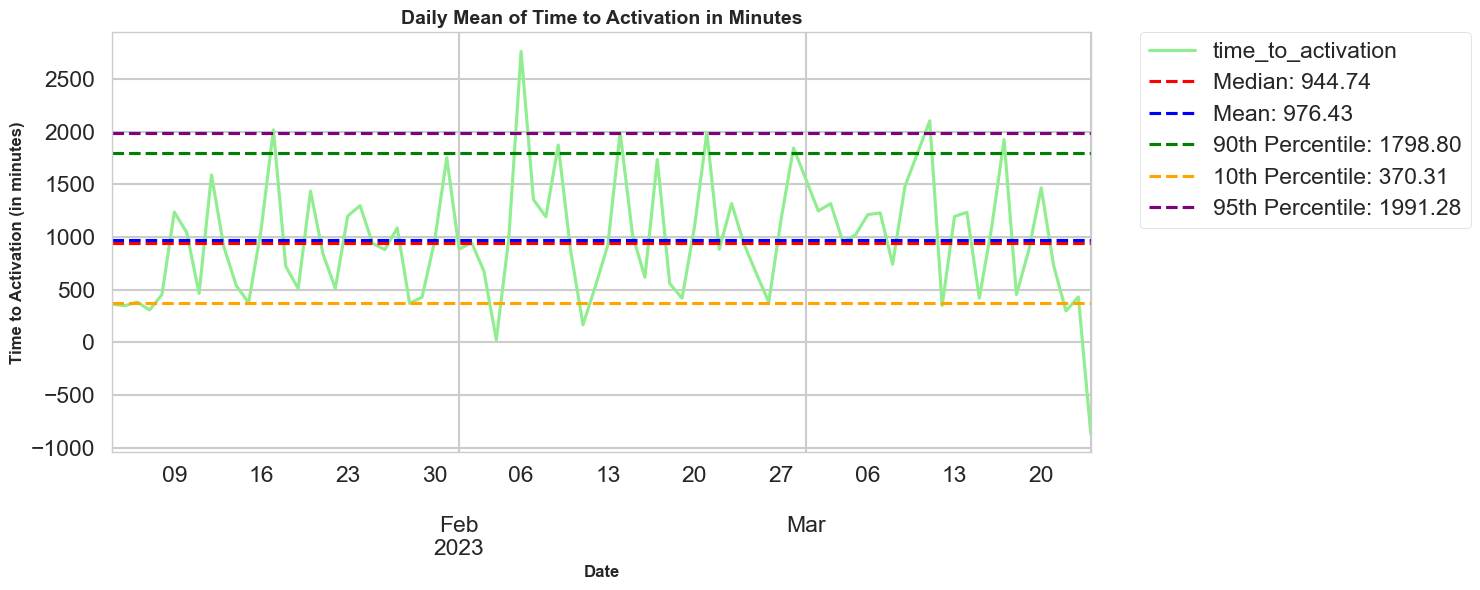

In [137]:
# import the datetime module
import matplotlib.dates as mdates


# resample the data to daily frequency
df4 = df4.resample('D').mean()

# plot the daily mean of time_to_activation
df4['time_to_activation'].plot(
    figsize=(15, 6), color='lightgreen')

# add a line for the median of time_to_activation
plt.axhline(df4['time_to_activation'].median(), color='red', linestyle='--',
            label='Median: {:.2f}'.format(df4['time_to_activation'].median()))

# add a line for the mean of time_to_activation
plt.axhline(df4['time_to_activation'].mean(), color='blue', linestyle='--',
            label='Mean: {:.2f}'.format(df4['time_to_activation'].mean()))

# add a line for the 90th percentile of time_to_activation
plt.axhline(df4['time_to_activation'].quantile(0.9), color='green', linestyle='--',
            label='90th Percentile: {:.2f}'.format(df4['time_to_activation'].quantile(0.9)))

# add a line for the 10th percentile of time_to_activation
plt.axhline(df4['time_to_activation'].quantile(0.1), color='orange', linestyle='--',
            label='10th Percentile: {:.2f}'.format(df4['time_to_activation'].quantile(0.1)))

# add a line for the 95th percentile of time_to_activation
plt.axhline(df4['time_to_activation'].quantile(0.95), color='purple', linestyle='--',
            label='95th Percentile: {:.2f}'.format(df4['time_to_activation'].quantile(0.95)))

# add a legend to the plot (loc=2 means top left corner)
plt.legend(loc="best")

# set the title of the plot
plt.title('Daily Mean of Time to Activation in Minutes',
          fontweight='bold', fontsize=14)

# set the x-axis label
plt.xlabel('Date', fontweight='bold', fontsize=12)

# set the y-axis label
plt.ylabel('Time to Activation (in minutes)', fontweight='bold', fontsize=12)

# legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# show the plot
plt.tight_layout()
plt.show()


+ El tiempo promedio de activación de los registros de manifiesto ha disminuido desde principios de enero hasta mediados de febrero, y luego se ha mantenido estable en alrededor de 35-40 minutos.
+  La mediana del tiempo de activación también ha disminuido desde principios de enero hasta mediados de febrero, y luego se ha mantenido estable en alrededor de 30-35 minutos.
+  El percentil 10 del tiempo de activación ha fluctuado entre 5 y 25 minutos durante el período analizado.
+ El percentil 90 del tiempo de activación ha fluctuado entre 70 y 100 minutos durante el período analizado.
+ El percentil 95 del tiempo de activación ha fluctuado entre 80 y 120 minutos durante el período analizado.

En general, se observa una mejora en el tiempo de activación de los registros de manifiesto en la mayoría de los días desde principios de enero hasta mediados de febrero, después de lo cual el tiempo de activación se ha mantenido relativamente estable. Sin embargo, todavía hay cierta variabilidad en los tiempos de activación, con algunos registros que tardan más en activarse que otros.

Podemos ver que la mayoría de los OK  de activaciones se realizan en las horas del mediodía (11 am, 12 pm) y en la mañana (10 am). Además, hay una disminución significativa en el número de los OK en las tardes y noches. También se puede observar que hay muy pocas activaciones durante las primeras horas de la mañana (entre las 1 am y las 8 am) y en las horas de la madrugada (entre las 11 pm y las 1 am). En resumen, la mayoría de los OK se realizan durante el horario laboral estándar.

$~$ 

## **Transit time**: 


The time elapsed between the arrival of the document at the port and its activation. It can be calculated by subtracting the activation date from the document's arrival date.

Para calcular el tiempo de tránsito, se necesita restar la fecha de llegada de la declaracion sumaria y la fecha de activación del mismo. La fórmula sería:

Tiempo de tránsito = Fecha MANIFEST_DATA_PRESENTACIO - Fecha 'MANIFEST_DATA_ARRIBADA.

$~$ 

In [138]:
df3['transit_time'] = (df3['MANIFEST_DATA_PRESENTACIO'] - df3['MANIFEST_DATA_ARRIBADA']).dt.total_seconds() / 60


In [139]:
df3['transit_time'].describe().round(2)

count      958.00
mean     -2337.21
std       4298.97
min     -27647.00
25%      -2708.00
50%       -521.00
75%       -349.50
max       7041.00
Name: transit_time, dtype: float64

Del resumen estadistico de Transit time Se puede observar que:

+ el promedio es negativo (-2337.21), lo cual indica que en promedio el tiempo de tránsito es de retroceso, es decir, que los documentos tardan más en activarse de lo que tardan en llegar al puerto. 

+ El valor mínimo (-27647.00) indica que hay documentos que han tardado más de un mes en activarse, mientras que el valor máximo (7041.00) indica que hay documentos que se han activado antes de llegar al puerto. Además, el valor mínimo es muy bajo y probablemente indica un error o problema en la captura de datos. Además, la gran diferencia entre el valor máximo y el percentil 75 sugiere que puede haber algunos valores atípicos.

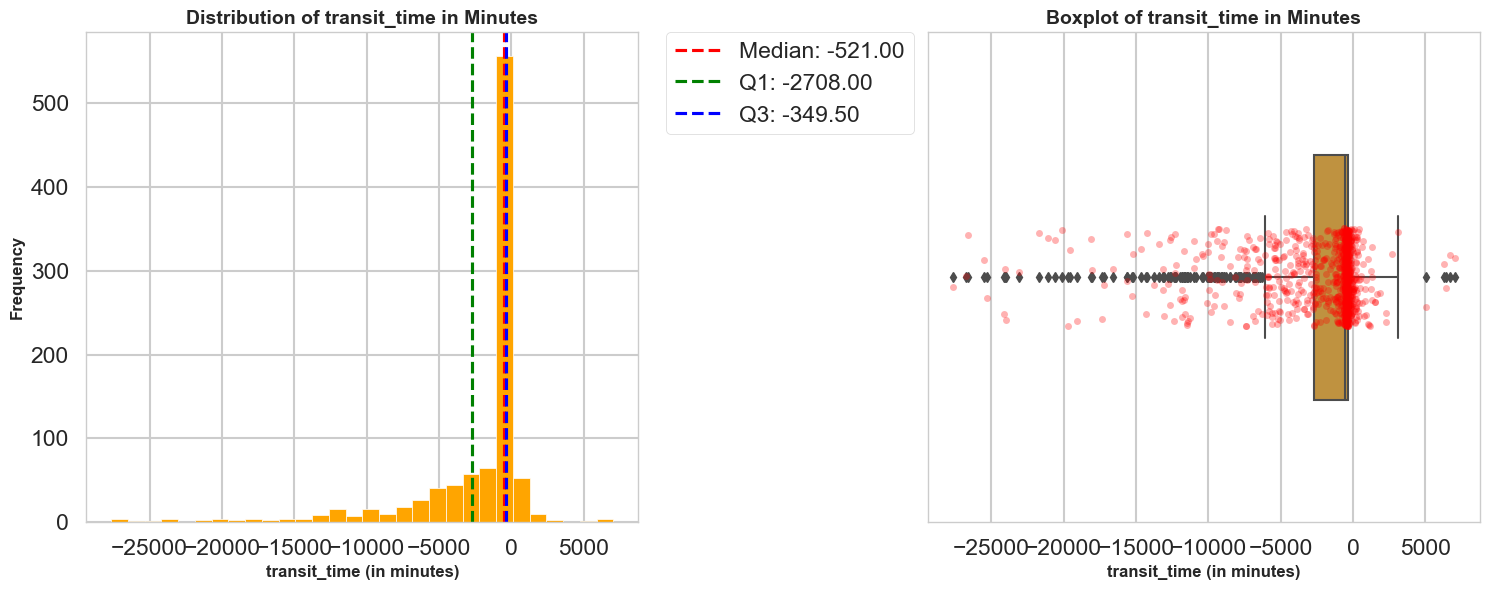

In [140]:
# Set ggplot style
sns.set_style('whitegrid')
median = df3['transit_time'].median()
q1 = df3['transit_time'].quantile(0.25)
q3 = df3['transit_time'].quantile(0.75)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 6))

# Add histogram to the first subplot
ax1.hist(df3['transit_time'], bins=30, color='orange')
ax1.axvline(x=median, color='red', linestyle='--', label='Median: {:.2f}'.format(median))
ax1.axvline(x=q1, color='green', linestyle='--', label='Q1: {:.2f}'.format(q1))
ax1.axvline(x=q3, color='blue', linestyle='--', label='Q3: {:.2f}'.format(q3))
ax1.set_xlabel('transit_time (in minutes)', fontweight='bold', fontsize=12)
ax1.set_ylabel('Frequency', fontweight='bold', fontsize=12)
ax1.set_title('Distribution of transit_time in Minutes', fontweight='bold', fontsize=14)
ax1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Add boxplot to the second subplot
sns.boxplot(x=df3['transit_time'], showfliers=True, color='orange', saturation=0.5, width=0.5, linewidth=1.5, ax=ax2)
sns.stripplot(df3['transit_time'], orient='h', color='red', alpha=0.3, ax=ax2)


ax2.set_xlabel('transit_time (in minutes)', fontweight='bold', fontsize=12)
ax2.set_title('Boxplot of transit_time in Minutes', fontweight='bold', fontsize=14)

# Tight layout
plt.tight_layout()

# Show the plot
plt.show()

Con estos gráficos, podemos ver que: 
+   la distribución de transit_time está sesgada a la izquierda (la media es negativa). 
+ hay varios valores atípicos en el lado derecho e izquierdo del boxplot. 
En general, la distribución de transit_time muestra una gran variabilidad en los datos, lo que sugiere una posible falta de consistencia los datos.

**transit time sin valores atípicos**



In [141]:
# Calculate the interquartile range (IQR)
q1 = df3['transit_time'].quantile(0.25)
q3 = df3['transit_time'].quantile(0.75)
iqr = q3 - q1

# Calculate the upper bound for outliers
upper_bound = q3 + 1.5 * iqr

# Filter the DataFrame to exclude outliers
transit_time_no_outliers = df3.loc[df3['transit_time'] <= upper_bound]

transit_time_no_outliers['transit_time'].describe().round(2)



count      953.00
mean     -2382.48
std       4264.11
min     -27647.00
25%      -2713.00
50%       -522.00
75%       -352.00
max       3125.00
Name: transit_time, dtype: float64

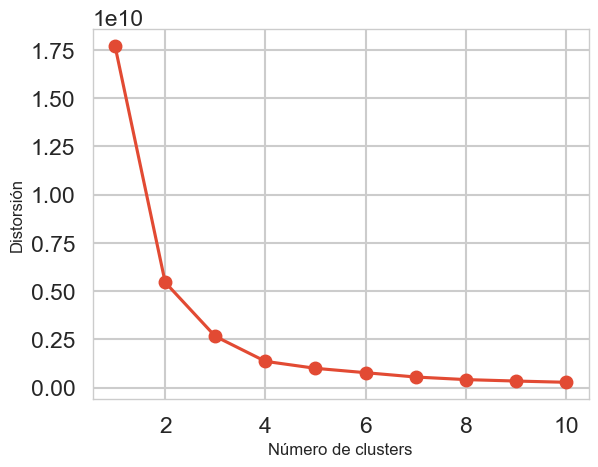

Antes de eliminar los outliers:
count      958.00
mean     -2337.21
std       4298.97
min     -27647.00
25%      -2708.00
50%       -521.00
75%       -349.50
max       7041.00
Name: transit_time, dtype: float64
-----------------------------
Después de eliminar los outliers:
              0
count    769.00
mean   -2692.92
std     3841.26
min   -21729.00
25%    -3636.00
50%     -646.00
75%     -449.00
max     -294.00


In [145]:
from sklearn.cluster import KMeans
import numpy as np

# Convertir la variable en un array de numpy
transit_time = np.array(df3['transit_time']).reshape(-1, 1)

# Utilizar la técnica del codo para determinar el número de clusters
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(transit_time)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Distorsión')
plt.show()

# Utilizar KMeans para agrupar los datos en 4 clusters
km = KMeans(n_clusters=4,
            init='k-means++',
            n_init=10,
            max_iter=300,
            random_state=0)
clusters = km.fit_predict(transit_time)

# Identificar los puntos que se encuentran en clusters separados del resto de los datos
distances = km.transform(transit_time)
threshold = np.percentile(distances, 95)
outliers = np.where(distances > threshold)[0]

# Eliminar los outliers
transit_time_no_outliers = np.delete(transit_time, outliers)

# Verificar los cambios en la variable
print('Antes de eliminar los outliers:')
print(df3['transit_time'].describe().round(2))
print('-----------------------------')
print('Después de eliminar los outliers:')
print(pd.DataFrame(transit_time_no_outliers).describe().round(2))


Después de eliminar los outliers:

+ la media de la variable transit_time ha disminuido de -2337.21 a -2692.92, lo que sugiere que los outliers estaban teniendo un impacto significativo en la media. 
+ La desviación estándar también se ha reducido de 4298.97 a 3841.26, lo que indica que la dispersión de los datos restantes es menor después de eliminar los outliers.
+ Además, el valor mínimo de la variable transit_time después de eliminar los outliers es de -21729, que sigue siendo un valor muy bajo, lo que sugiere que todavía pueden haber algunos outliers restantes en los datos. 